# IRT Footprint Generating Program
Notes: 
- This program is created based on the reserach needs at University of California Merced.
- This program could be used if you have Apogee IRT sensor (different circular types) and you have the needs to visualize its footprint area in either agricultural or forest areas.
- Used for research purpose in California State (geographic inforamtion need to be modified appropriately for other places).

Required inputs:
- Height (h_irt): the height between the IRT sensor to the ground surface.
- FOV (fov_irt): The view angle of the Apogee IRT sensor. We used 14 as the defaul, users can define it accordingly.
- IRT vertical angle (alpha_irt_vertical): the angle between the center line of the IRT sensor and the downside of the vertical line from the center point of the IRT sensor.
- IRT horizontal angle (beta_irt_horizontal): the direction of the IRT sensor point out to on the horizontal surface. The magnetic north is 0; the east is 90; the south is 180; and the west is 270.
- IRT location (lat, lon): the latitude and longitude of the IRT sensor.
- File name (filename): a name for the generated TIFF and Shapefile format outputs.
- Footprint pixel size (pixel_size): the pixel size of the generated TIFF image. We recommend a high resolution (e.g., 0.01 m).

Final output:<br>
A footprint area with geospatial information, which can be used directly on the ArcGIS Pro or QGIS.<br>
- Pixel size could be tuned.
- Pixel value = 1 means the observed area.
- Pixel value = 0 means the non-observed area.
- Both TIFF and Shapefile format documents are provided.

Creation Date: 2025-07-11<br>
Contact Info:<br>
Rui Gao<br>
Rui.Ray.Gao@Gmail.com<br>
RuiGao@UCMerced.edu<br>

Step 1 - Calculating the cycle/ellipse on the Cartesian coordinate system ...
Information about the beam center:
The distance from the beam center to the IRT sensor location is (OB): 2.000
The distance from the beam center to the ellipse boundary is (BE): 1.143

Information about the ellipse:
The distance from the IRT projected location to the farthest point on the ellipse (OD): 4.712
The distance from the IRT projected location to the nearest point on the ellipse (OA): 0.849
The length of the semi-major-axis is (CD or CA): 1.931
The distance of the center of the ellipse to the projected IRT sensor is (OC): 2.780
The length between beam center and ellipse center (BC): 0.780
The length from the sensor to the beam center (BH): 2.828
The length of the semi-minor-axis is (CF): 1.249
Footprint area of the ellipse is 7.580 square meter
Dimension of the ellipse is: 2
Dimension of the center beam point is: 0
Dimension of the ellipse center point is: 0


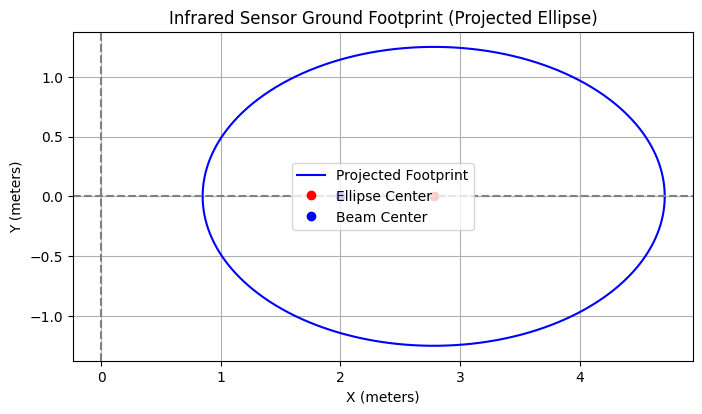


Step 2 - Rotating the cycle/ellipse on the Cartesian coordinate system (North-South) ...
Dimension of the ellipse is: 2
Dimension of the center beam point is: 2
Dimension of the ellipse center point is: 2


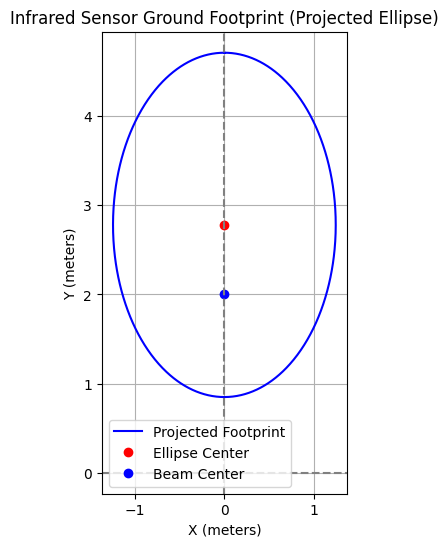


Step 3 - Rotating the cycle/ellipse on the Cartesian coordinate system based on user defined angle ...
Dimension of the ellipse is: 2
Dimension of the center beam point is: 2
Dimension of the ellipse center point is: 2


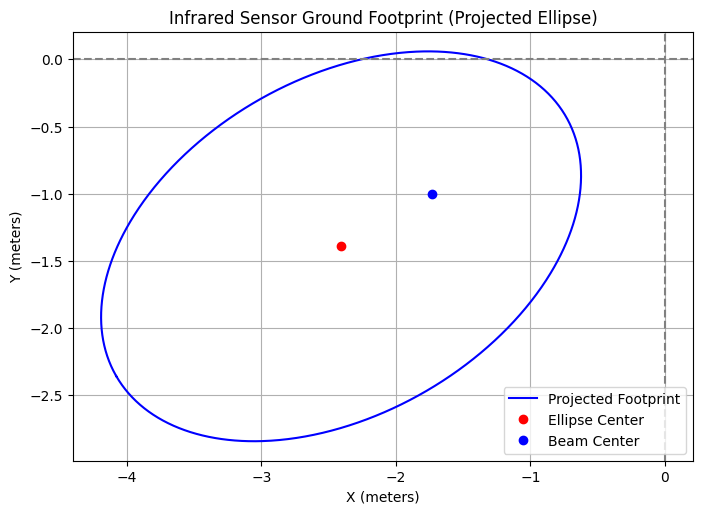


Step 4 - Transfering the cycle/ellipse from the Cartesian coordinate system to the georeferenced coordiante system and generate footprint TIFF image ...
First few UTM points:
 [[ 729136.77267963 4137420.55563137]
 [ 729136.77597587 4137420.54997516]
 [ 729136.77931795 4137420.54434562]]
First few Lat/Lon points:
 [[-120.41288486   37.35523099]
 [-120.41288482   37.35523094]
 [-120.41288479   37.35523089]]
The number of points on the ellipse is 1200
IRT footprint is saved as Apogee_IRT_Footprint_Demo.tif
Shapefile saved to: Apogee_IRT_Footprint_Demo.shp

 Showing the final ellipse and the ellipse center:


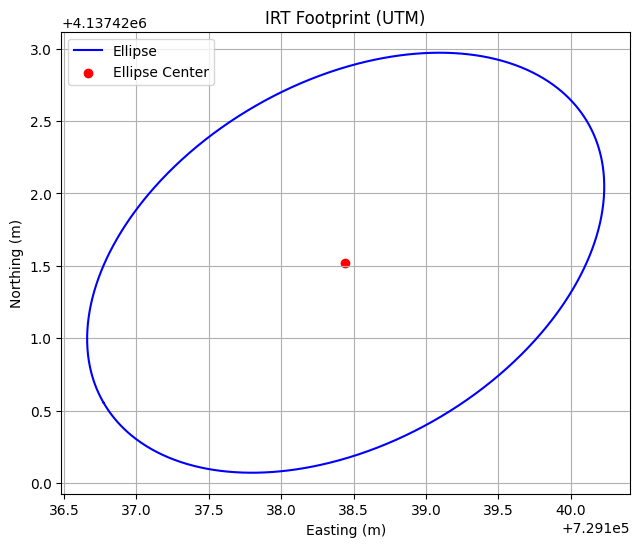

In [ ]:
from compute_footprint_ellipse import compute_footprint_ellipse
from georeference_ellipse import georeference_ellipse
from plot_ellipse_utm import plot_ellipse_utm
from plot_rotated_ellipse import plot_rotated_ellipse
from plot_ellipse import plot_ellipse
from rotate_ellipse_local import rotate_ellipse_local
from transform_ellipse_to_north import transform_ellipse_to_north
from save_ellipse_as_geotiff import save_ellipse_as_geotiff
from tiff_to_shapefile import tiff_to_shapefile
import numpy as np

# Inputs:
# Key parameters from the field work
# Height of the IRT sensor
h_irt = 2
# The FOV of the Apogee IRT sensor (e.g., 14, 18, 22, etc.)
fov_irt = 22
# The vertical angle of the IRT sensor (check description)
alpha_irt_vertical = 45
# The direction that the IRT sensor point to on the horizontal surface (facing to the magnetic north is 0; east=90; south=180; west=270, check description)
beta_irt_horizontal = 240 
# IRT sensor location
lat = 37.3552512
lon = -120.4128381

# Outputs
# Footprint image name
filename = "Apogee_IRT_Footprint_Demo.tif"
# The pixel size of the footprint image (recommend high resolution)
pixel_size = 0.01


# === Step 1 === #
# Letters below can refer to our manual.
# === ====== === #
print("Step 1 - Calculating the cycle/ellipse on the Cartesian coordinate system ...")
# Calculating basical inforamtion about the ellipse on the 2D Cartesian coordinate system
# The coordinates will be presented on the x-axis direction (horizontally)
OC, BE, OB, CA, CF, ellipse = compute_footprint_ellipse(h_irt, alpha_irt_vertical, fov_irt)
# Calculate the footprint area and print them out
footprint_area = CA*CF*np.pi
print(f"Footprint area of the ellipse is {footprint_area:.3f} square meter")
plot_ellipse(ellipse, OB, OC)

# === Step 2 === #
# === ====== === #
print("\nStep 2 - Rotating the cycle/ellipse on the Cartesian coordinate system (North-South) ...")
# Adjust to y-axis direction on the Cartesian coordinate system and display them
center_beam = transform_ellipse_to_north(np.array([[OB, 0.0]]))[0]
ellipse_center = transform_ellipse_to_north(np.array([[OC, 0.0]]))[0]
ellipse = transform_ellipse_to_north(ellipse)
plot_rotated_ellipse(ellipse, center_beam[None, :], ellipse_center[None, :])

# === Step 3 === #
# === ====== === #
print("\nStep 3 - Rotating the cycle/ellipse on the Cartesian coordinate system based on user defined angle ...")
# Apply 2D rotation using rotation matrix on the Cartesian coordiante system
# IRT sensor assumed at (0,0) in the Cartesian coordinate system
sensor_local = np.array([0.0, 0.0])
# Rotating everything and display them
center_beam_rotated = rotate_ellipse_local(center_beam[None, :], center_point=sensor_local, angle_deg=beta_irt_horizontal)
ellipse_center_rotated = rotate_ellipse_local(ellipse_center[None, :], center_point=sensor_local, angle_deg=beta_irt_horizontal)
ellipse_rotated = rotate_ellipse_local(ellipse, center_point=sensor_local, angle_deg=beta_irt_horizontal)
plot_rotated_ellipse(ellipse_rotated, center_beam_rotated, ellipse_center_rotated)

# === Step 4 === #
# === ====== === #
print("\nStep 4 - Transfering the cycle/ellipse from the Cartesian coordinate system to the georeferenced coordiante system and generate footprint TIFF image ...")
# Transfer from the Cartesian coordinate system to the georeferenced coordinate system
# Get georeferenced coordinates
ellipse_utm, ellipse_latlon = georeference_ellipse(ellipse_rotated, lat, lon)
print("First few UTM points:\n", ellipse_utm[:3])
print("First few Lat/Lon points:\n", ellipse_latlon[:3])
print("The number of points on the ellipse is", len(ellipse_utm))
# Save to TIFF image
save_ellipse_as_geotiff(ellipse_utm, filename=filename, pixel_size=pixel_size, value=1)
# Save to shapefile
tiff_to_shapefile(filename, target_value=1)
# Display it
print("\n Showing the final ellipse and the ellipse center:")
plot_ellipse_utm(ellipse_utm)